In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3633.868, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3628.960, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3630.821, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3630.823, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3628.100, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3631.763, Time=2.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.304 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  778
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1813.050
Date:                Mon, 19 Jun 2023   AIC                           3628.100
Time:                        01:05:41   BIC                           3632.755
Sample:                             0   HQIC                          3629.891
          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


778    146.936289
779    143.628004
780    146.508154
781    146.113561
782    146.594270
          ...    
995    125.382353
996    125.148699
997    124.348213
998    124.218405
999    123.963115
Name: predicted_mean, Length: 222, dtype: float64
                           Close-shop
Date                                 
2022-12-20 00:00:00-05:00   35.990002
2022-12-21 00:00:00-05:00   36.189999
2022-12-22 00:00:00-05:00   34.680000
2022-12-23 00:00:00-05:00   33.709999
2022-12-27 00:00:00-05:00   33.389999
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[112 rows x 1 columns]
778    124.177429
779    124.263197
780    123.609966
781    123.189841
782    123.051364
          ...    
885    133.573258
886    134.243934
887    133.780951
888    133.348257
889    133.672778
Name: predicted_mean, Length: 112, d

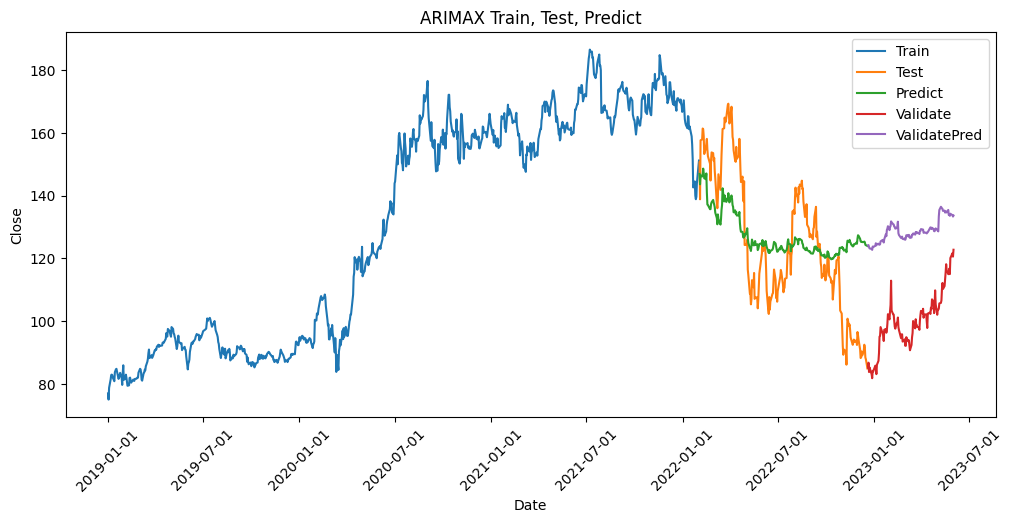

In [3]:
#AMZN 7:2:1

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/AMZN (1).csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3091.167, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3087.797, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3088.804, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3088.813, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3087.745, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3089.325, Time=1.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.112 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  667
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1542.873
Date:                Mon, 19 Jun 2023   AIC                           3087.745
Time:                        01:08:08   BIC                           3092.247
Sample:                             0   HQIC                          3089.489
          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


667    165.922593
668    164.229576
669    164.945099
670    165.711372
671    164.630484
          ...    
995    113.756429
996    113.514859
997    112.687253
998    112.553047
999    112.289109
Name: predicted_mean, Length: 333, dtype: float64
                           Close-shop
Date                                 
2022-12-20 00:00:00-05:00   35.990002
2022-12-21 00:00:00-05:00   36.189999
2022-12-22 00:00:00-05:00   34.680000
2022-12-23 00:00:00-05:00   33.709999
2022-12-27 00:00:00-05:00   33.389999
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[112 rows x 1 columns]
667    112.582808
668    112.619259
669    111.950671
670    111.496564
671    111.356013
          ...    
774    122.224837
775    122.918235
776    122.439566
777    121.992213
778    122.327728
Name: predicted_mean, Length: 112, d

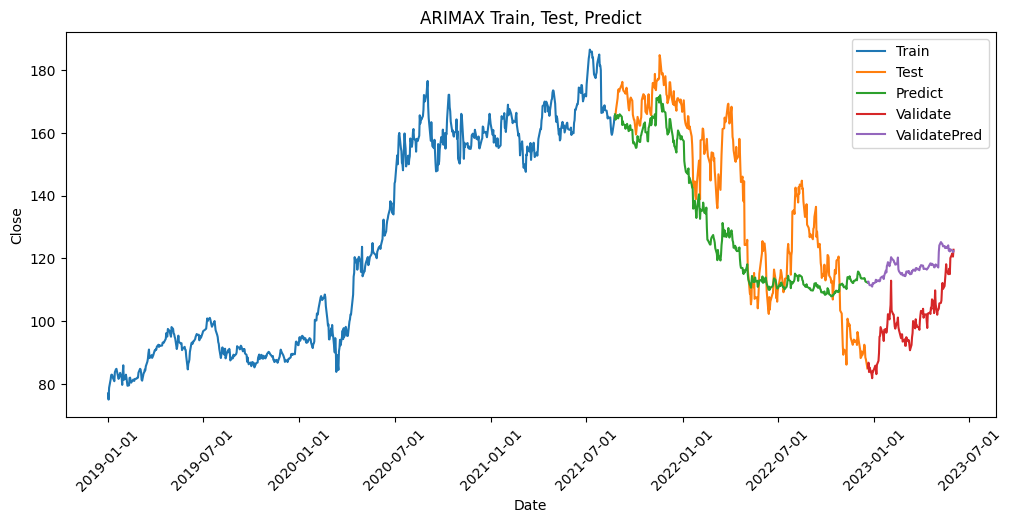

In [6]:
#AMZN 6:3:1

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/AMZN (1).csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.6 * len(data))
test_size = int(0.3 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3091.167, Time=2.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3087.797, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3088.804, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3088.813, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3087.745, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3089.325, Time=1.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.207 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  667
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1542.873
Date:                Mon, 19 Jun 2023   AIC                           3087.745
Time:                        01:08:32   BIC                           3092.247
Sample:                             0   HQIC                          3089.489
          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


667    165.922593
668    164.229576
669    164.945099
670    165.711372
671    164.630484
          ...    
884    112.213059
885    112.320423
886    110.866523
887    110.893365
888    110.790474
Name: predicted_mean, Length: 222, dtype: float64
                           Close-shop
Date                                 
2022-07-14 00:00:00-04:00   30.670000
2022-07-15 00:00:00-04:00   31.270000
2022-07-18 00:00:00-04:00   32.540001
2022-07-19 00:00:00-04:00   34.369999
2022-07-20 00:00:00-04:00   38.490002
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[223 rows x 1 columns]
667    110.202885
668    110.418279
669    110.993334
670    111.791818
671    113.637518
          ...    
885    122.224837
886    122.918235
887    122.439566
888    121.992213
889    122.327728
Name: predicted_mean, Length: 223, d

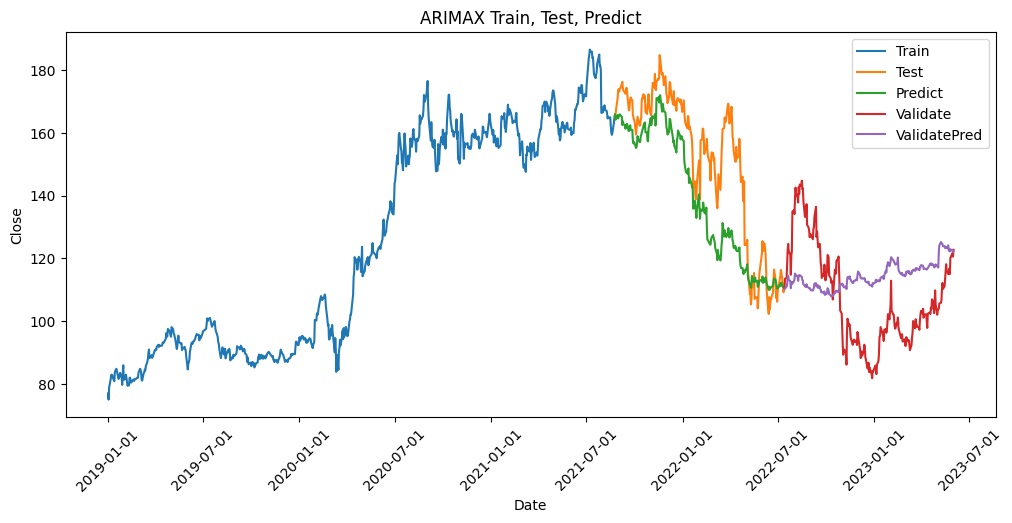

In [7]:
#AMZN 6:2:2

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/AMZN (1).csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4715.501, Time=4.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4720.416, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4719.607, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4719.870, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4718.420, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4718.748, Time=1.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4718.845, Time=1.00 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4719.293, Time=2.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4719.480, Time=1.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4717.487, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4719.316, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4719.895, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4718.860, Time=4.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4713.505, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


778    122.765501
779    119.225928
780    122.331788
781    121.831606
782    122.438486
          ...    
995    100.016025
996     99.762254
997     98.923422
998     98.782783
999     98.515436
Name: predicted_mean, Length: 222, dtype: float64
                           Close-shop
Date                                 
2022-12-20 00:00:00-05:00   35.990002
2022-12-21 00:00:00-05:00   36.189999
2022-12-22 00:00:00-05:00   34.680000
2022-12-23 00:00:00-05:00   33.709999
2022-12-27 00:00:00-05:00   33.389999
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[112 rows x 1 columns]
778     98.759561
779     98.800019
780     98.178885
781     97.651773
782     97.605539
          ...    
885    108.643758
886    109.363983
887    108.868768
888    108.413368
889    108.760408
Name: predicted_mean, Length: 112, d

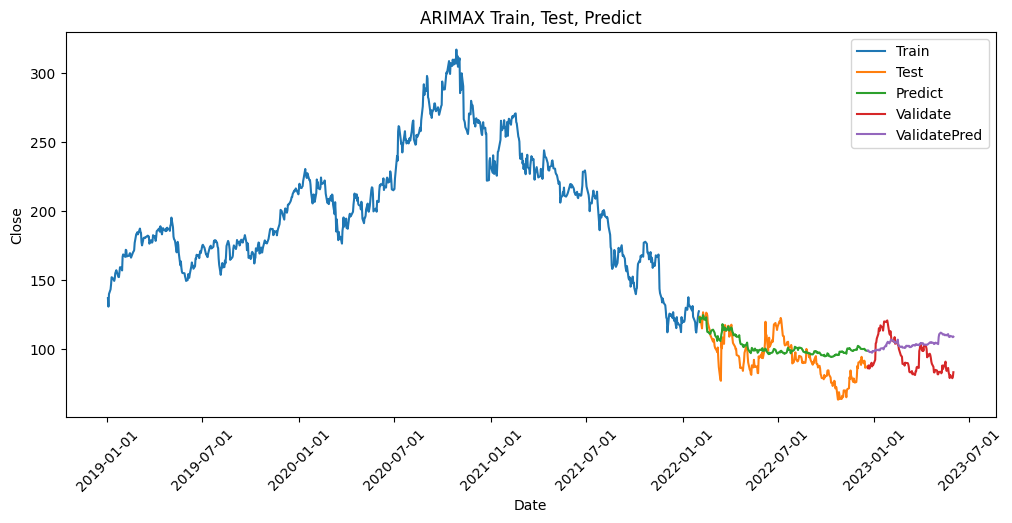

In [8]:
#BABA 7:2:1

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/BABA.csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4054.985, Time=2.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4060.924, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4060.205, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4060.438, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4058.995, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4059.426, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4059.557, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4056.004, Time=2.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4056.253, Time=1.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4058.136, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4058.468, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4059.732, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4058.454, Time=1.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4053.055, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


667    171.968889
668    170.533914
669    171.058936
670    172.056010
671    170.847660
          ...    
995    113.386351
996    113.113590
997    112.179126
998    112.027592
999    111.729574
Name: predicted_mean, Length: 333, dtype: float64
                           Close-shop
Date                                 
2022-12-20 00:00:00-05:00   35.990002
2022-12-21 00:00:00-05:00   36.189999
2022-12-22 00:00:00-05:00   34.680000
2022-12-23 00:00:00-05:00   33.709999
2022-12-27 00:00:00-05:00   33.389999
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[112 rows x 1 columns]
667    111.741995
668    112.259794
669    111.221990
670    110.841112
671    110.694513
          ...    
774    122.948180
775    123.731108
776    123.190635
777    122.685520
778    123.064356
Name: predicted_mean, Length: 112, d

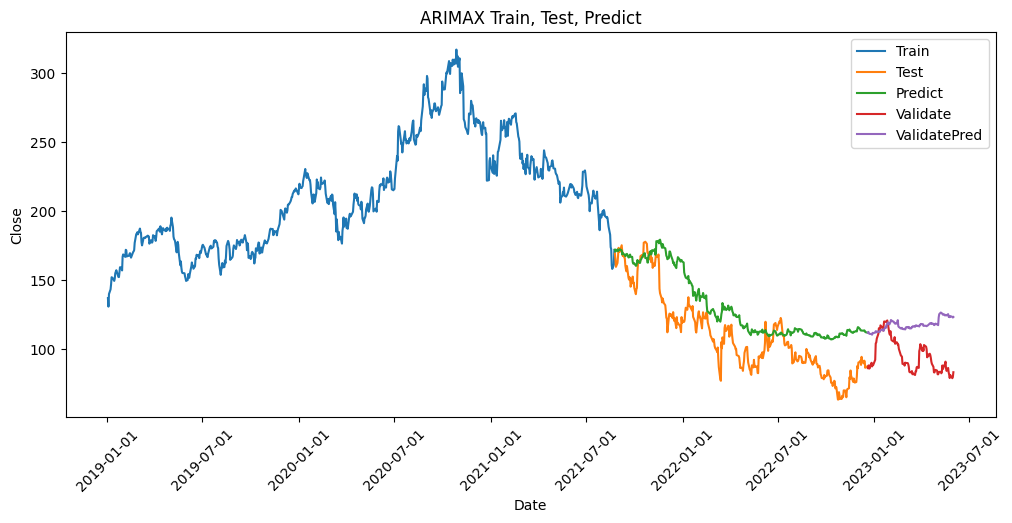

In [9]:
#BABA 6:3:1

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/BABA.csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.6 * len(data))
test_size = int(0.3 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4054.985, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4060.924, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4060.205, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4060.438, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4058.995, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4059.426, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4059.557, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4056.004, Time=1.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4056.253, Time=1.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4058.136, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4058.468, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4059.732, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4058.454, Time=1.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4053.055, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


667    171.968889
668    170.533914
669    171.058936
670    172.056010
671    170.847660
          ...    
884    111.643705
885    111.764932
886    110.123308
887    110.153615
888    110.037439
Name: predicted_mean, Length: 222, dtype: float64
                           Close-shop
Date                                 
2022-07-14 00:00:00-04:00   30.670000
2022-07-15 00:00:00-04:00   31.270000
2022-07-18 00:00:00-04:00   32.540001
2022-07-19 00:00:00-04:00   34.369999
2022-07-20 00:00:00-04:00   38.490002
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[223 rows x 1 columns]
667    109.054781
668    109.774628
669    110.141044
670    111.174488
671    113.270601
          ...    
885    122.948180
886    123.731108
887    123.190635
888    122.685520
889    123.064356
Name: predicted_mean, Length: 223, d

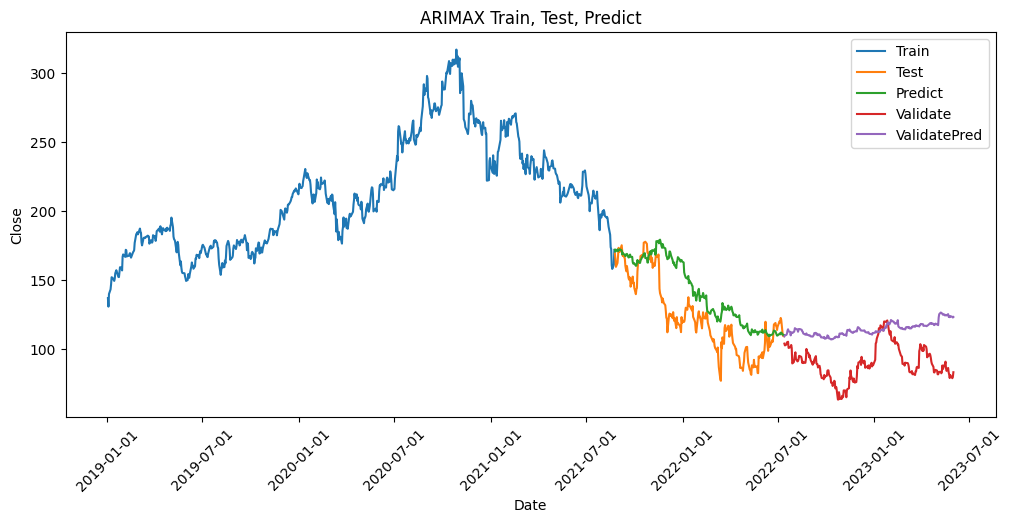

In [10]:
#BABA 6:2:2

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/BABA.csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2226.012, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2218.185, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2220.055, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2220.054, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2217.470, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2222.042, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.774 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  778
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1107.735
Date:                Mon, 19 Jun 2023   AIC                           2217.470
Time:                        01:13:24   BIC                           2222.125
Sample:                             0   HQIC                          2219.261
          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


778    57.687468
779    56.941324
780    57.624368
781    57.552275
782    57.672598
         ...    
995    52.775312
996    52.720349
997    52.532048
998    52.501513
999    52.441460
Name: predicted_mean, Length: 222, dtype: float64
                           Close-shop
Date                                 
2022-12-20 00:00:00-05:00   35.990002
2022-12-21 00:00:00-05:00   36.189999
2022-12-22 00:00:00-05:00   34.680000
2022-12-23 00:00:00-05:00   33.709999
2022-12-27 00:00:00-05:00   33.389999
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[112 rows x 1 columns]
778    52.333828
779    52.386078
780    52.237953
781    52.159855
782    52.134524
         ...    
885    54.702085
886    54.859850
887    54.750941
888    54.649157
889    54.725495
Name: predicted_mean, Length: 112, dtype: float64
Validati

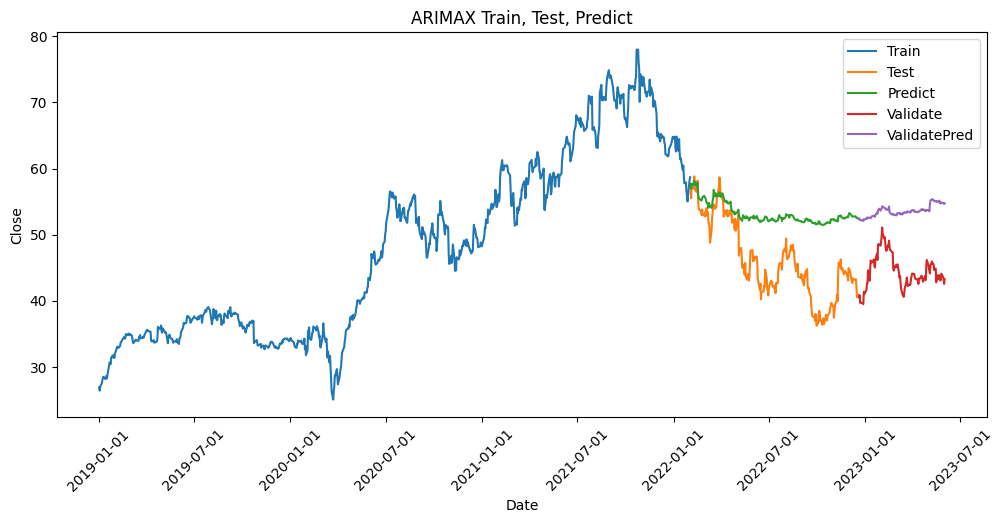

In [11]:
#EBA 7:2:1

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/EBAY.csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1816.093, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1815.319, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1816.847, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1816.845, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1816.501, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1818.845, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.190 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  667
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -905.659
Date:                Mon, 19 Jun 2023   AIC                           1815.319
Time:                        01:15:40   BIC                           1824.321
Sample:                             0   HQIC                          1818.807
          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


667    70.373548
668    69.934863
669    70.054762
670    70.198966
671    69.906413
         ...    
995    57.624739
996    57.567664
997    57.372128
998    57.340420
999    57.278060
Name: predicted_mean, Length: 333, dtype: float64
                           Close-shop
Date                                 
2022-12-20 00:00:00-05:00   35.990002
2022-12-21 00:00:00-05:00   36.189999
2022-12-22 00:00:00-05:00   34.680000
2022-12-23 00:00:00-05:00   33.709999
2022-12-27 00:00:00-05:00   33.389999
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[112 rows x 1 columns]
667    57.771130
668    57.741061
669    57.533940
670    57.389809
671    57.319426
         ...    
774    59.625543
775    59.789369
776    59.676276
777    59.570581
778    59.649852
Name: predicted_mean, Length: 112, dtype: float64
Validati

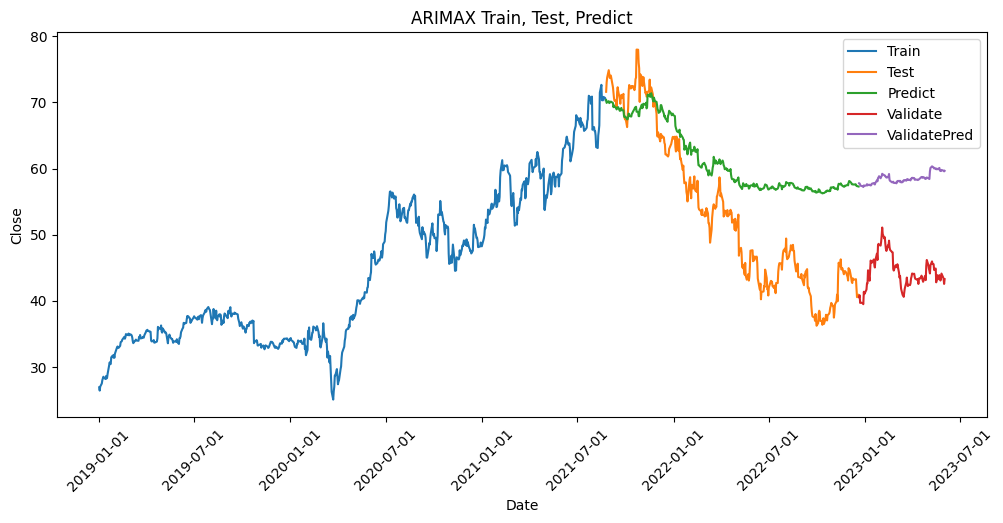

In [13]:
#EBA 6:3:1

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/EBAY.csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.6 * len(data))
test_size = int(0.3 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1816.093, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1815.319, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1816.847, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1816.845, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1816.501, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1818.845, Time=0.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.862 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  667
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -905.659
Date:                Mon, 19 Jun 2023   AIC                           1815.319
Time:                        01:16:13   BIC                           1824.321
Sample:                             0   HQIC                          1818.807
          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


667    70.373548
668    69.934863
669    70.054762
670    70.198966
671    69.906413
         ...    
884    57.260092
885    57.285458
886    56.941950
887    56.948292
888    56.923982
Name: predicted_mean, Length: 222, dtype: float64
                           Close-shop
Date                                 
2022-07-14 00:00:00-04:00   30.670000
2022-07-15 00:00:00-04:00   31.270000
2022-07-18 00:00:00-04:00   32.540001
2022-07-19 00:00:00-04:00   34.369999
2022-07-20 00:00:00-04:00   38.490002
...                               ...
2023-05-25 00:00:00-04:00   57.709999
2023-05-26 00:00:00-04:00   59.259998
2023-05-30 00:00:00-04:00   58.189999
2023-05-31 00:00:00-04:00   57.189999
2023-06-01 00:00:00-04:00   57.939999

[223 rows x 1 columns]
667    57.208833
668    57.221042
669    57.307754
670    57.459568
671    57.858470
         ...    
885    59.625542
886    59.789369
887    59.676276
888    59.570581
889    59.649852
Name: predicted_mean, Length: 223, dtype: float64
Validati

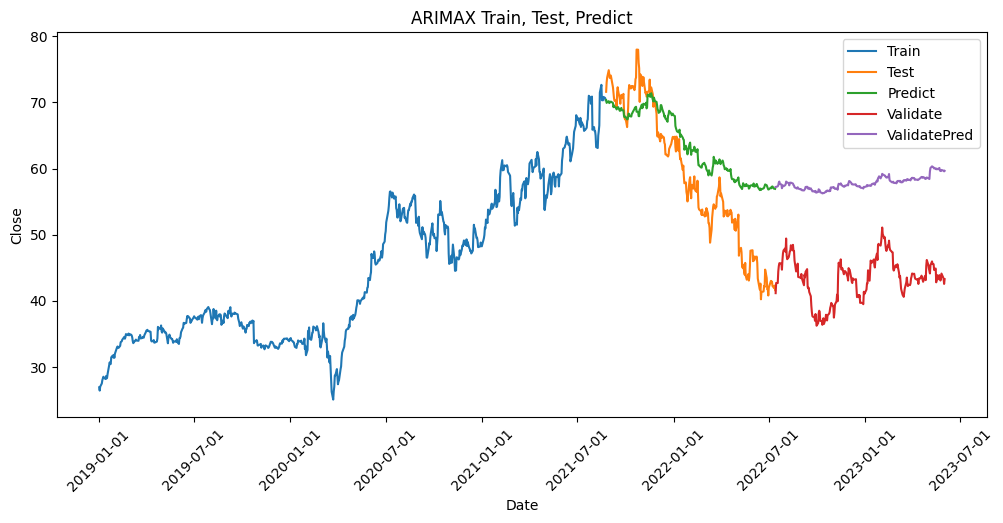

In [14]:
#EBA 6:2:2

#import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Đọc dữ liệu
df_data = pd.read_csv('/content/EBAY.csv')
exog_data = pd.read_csv('/content/Book2.csv')

#Kết hợp dữ liệu vào data
data = pd.merge(df_data, exog_data, on='Date')

#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
data.reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-shop']]
data = data.dropna() # Drop missing values

#Chia tập dữ liệu train, test, val
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

#tìm kiếm mô hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-shop"]]
model = auto_arima(train_data.Close,
                      test='adf',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

#tạo mô hình SARIMAX cho dữ liệu chuỗi thời gian
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close,
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-shop']]
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-shop']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)

plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])
# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()